# Disturbance intensity

In [18]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# System
from pathlib import Path

# Import functions from geo_tools module
import sys
from geo_tools import utils, plot_iso_forest, forest_barplot

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [2]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [3]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [4]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

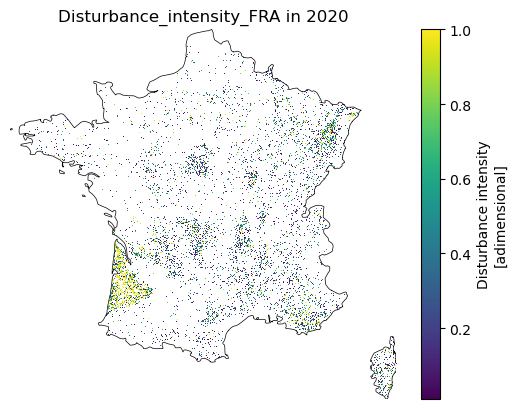

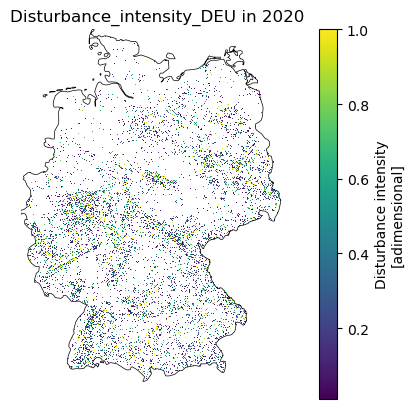

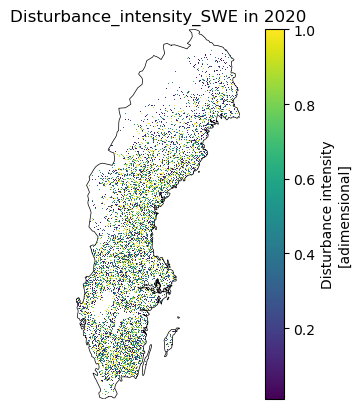

In [5]:
# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso,
        xarray_id="Disturbance_intensity"
    )

# Calculating area

In [19]:
%%time
# Template to store total area in Mha
disturbance_mha = []

# Template to store total area in percentage share
disturbance_perc = []

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv")

for iso in eu_iso:

    # Calculate area of undefined forest
    iso_disturbance = plot_iso_forest.agg_total_area(
        iso_code=iso, 
        xarray_id="Disturbance_intensity", 
        forest_layer_year=2020
    )
    disturbance_mha.append(iso_disturbance)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_fraction_class
    iso_disturbance[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_disturbance["Percentage share"] = iso_disturbance["Value"] / iso_disturbance[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_disturbance_perc = iso_disturbance.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_disturbance_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_disturbance_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )
    disturbance_perc.append(iso_disturbance_perc)

disturbance_perc_df = pd.concat(disturbance_perc)

CPU times: user 40.1 s, sys: 6.25 s, total: 46.4 s
Wall time: 46.4 s


In [20]:
disturbance_perc_df

,Region,Variable,Year,Unit,Value
0,BGR,Disturbance intensity,2020,Percentage share,0.081645
0,CYP,Disturbance intensity,2020,Percentage share,0.000000
0,DNK,Disturbance intensity,2020,Percentage share,0.214213
0,IRL,Disturbance intensity,2020,Percentage share,0.230457
0,EST,Disturbance intensity,2020,Percentage share,0.209450
0,AUT,Disturbance intensity,2020,Percentage share,0.180265
0,CZE,Disturbance intensity,2020,Percentage share,0.238284
0,FIN,Disturbance intensity,2020,Percentage share,0.244923
0,FRA,Disturbance intensity,2020,Percentage share,0.137426
0,DEU,Disturbance intensity,2020,Percentage share,0.145575


In [10]:
# Export as a CSV
disturbance_perc_df.to_csv(output_data_dir/"iso_disturbance_intensity.csv")

# Differentiating classes for forest cover fraction

In [28]:
%%time

# Import forest cover data
forest_cover = pd.read_csv(output_data_dir/"iso_forest_cover_stats.csv")

# Template to store country results in Mha
disturbance_class_ha = []

# Template to store country results in percentage share
disturbance_class_perc = []

for iso in eu_iso:

    # Calculate areas for each class
    iso_disturbance_class = utils.define_class(
        iso_code=iso, 
        xarray_id="Disturbance_intensity",
        forest_layer_year=2020,
        start_step=0,
        end_step=0.1,
        delta_diff=0.1,
        max_val=1,
    )
    disturbance_class_ha.append(iso_disturbance_class)

    # Get forest cover area within the country
    iso_forest_cover = forest_cover.loc[forest_cover.Region == iso]
    value_to_copy = iso_forest_cover.iloc[0, 5]

    # Copy forest cover to iso_fraction_class
    iso_disturbance_class[f"{iso}_forest_cover_Mha"] = value_to_copy

    # Calculate percentage share of fraction classes over total forest cover
    iso_disturbance_class["Percentage share"] = iso_disturbance_class["Value"] / iso_disturbance_class[f"{iso}_forest_cover_Mha"]

    # Creating final dataset
    iso_dist_class_perc = iso_disturbance_class.drop(["Unit", "Value", f"{iso}_forest_cover_Mha"], axis=1)

    iso_dist_class_perc.insert(
        loc=3,
        column="Unit",
        value="Percentage share"
    )

    iso_dist_class_perc.rename(
        columns={"Percentage share" : "Value"},
        inplace=True
    )

    disturbance_class_perc.append(iso_dist_class_perc)

disturb_class_perc_df = pd.concat(disturbance_class_perc)

CPU times: user 1min 8s, sys: 14.3 s, total: 1min 23s
Wall time: 1min 23s


In [34]:
disturb_class_perc_df.loc[disturb_class_perc_df.Region == "DEU"]

,Region,Variable,Year,Unit,Value
0,DEU,Disturbance_intensity >0 to <= 0.1,2020,Percentage share,0.080426
1,DEU,Disturbance_intensity >0.1 to <= 0.2,2020,Percentage share,0.053246
2,DEU,Disturbance_intensity >0.2 to <= 0.3,2020,Percentage share,0.050928
3,DEU,Disturbance_intensity >0.3 to <= 0.4,2020,Percentage share,0.036792
4,DEU,Disturbance_intensity >0.4 to <= 0.5,2020,Percentage share,0.030241
5,DEU,Disturbance_intensity >0.5 to <= 0.6,2020,Percentage share,0.026882
6,DEU,Disturbance_intensity >0.6 to <= 0.7,2020,Percentage share,0.020087
7,DEU,Disturbance_intensity >0.7 to <= 0.8,2020,Percentage share,0.022621
8,DEU,Disturbance_intensity >0.8 to <= 0.9,2020,Percentage share,0.015944
9,DEU,Disturbance_intensity >0.9 to <= 1.0,2020,Percentage share,0.035751


In [35]:
# Export as a CSV
disturb_class_perc_df.to_csv(output_data_dir/"iso_disturbance_intensity_class.csv")

# Plotting the fraction classes

Data description: Disturbance intensity
Data description: Disturbance intensity


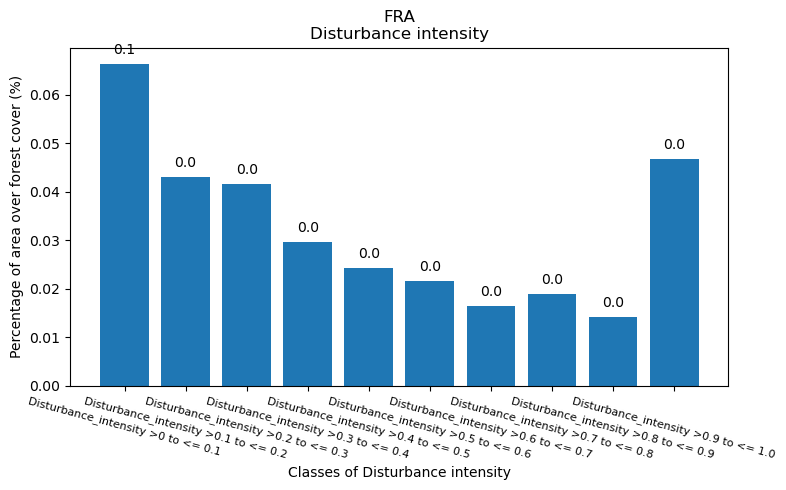

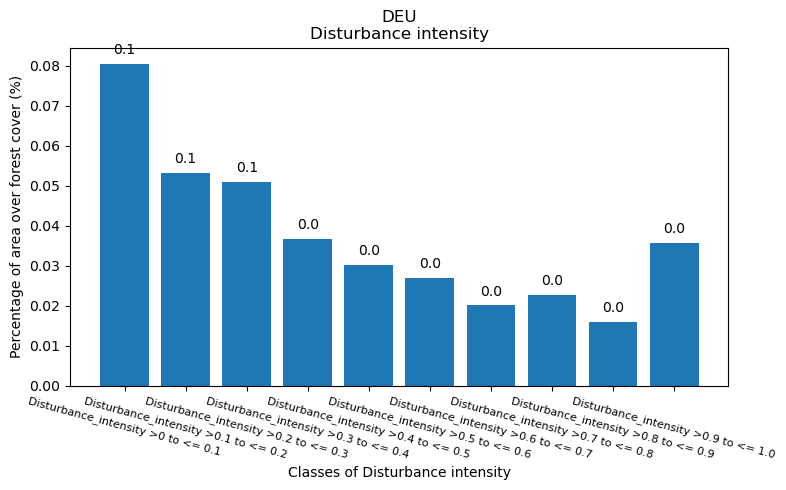

In [23]:
# Testing: creating the plots for fraction classes
for iso_ex in ["FRA", "DEU"]:
    
    # Subsetting countries
    iso_data = disturb_class_perc_df.loc[disturb_class_perc_df["Region"] == iso_ex]

    forest_barplot.plot_fraction_class(iso_data, iso_ex, "Disturbance_intensity")